In [1]:
import tensorflow as tf
import tensorflow_hub as tfhub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from PIL import Image
import os

In [ ]:
apple_data = '/content/drive/MyDrive/Capstone Project/Tea'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (224,224)
batch_size = 8


train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3
)

train_generator = train_datagen.flow_from_directory(
    apple_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    apple_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

test_generator = train_datagen.flow_from_directory(
    apple_data,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
)

Found 3245 images belonging to 9 classes.
Found 1386 images belonging to 9 classes.
Found 1386 images belonging to 9 classes.


In [3]:
hub_models = tfhub.load('https://tfhub.dev/rishit-dagli/plant-disease/1')
model_layer = tfhub.KerasLayer(hub_models, input_shape=(224,224,3))

In [4]:
model_layer.trainable = False

In [5]:
model = tf.keras.models.Sequential([
    model_layer,
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 38)                3267814   
                                                                 
 dense (Dense)               (None, 256)               9984      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 3,279,340
Trainable params: 11,526
Non-trainable params: 3,267,814
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=20,
    # callbacks=[early_stopping],
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

Epoch 1/20
405/405 [==============================] - 671s 2s/step - loss: 0.6056 - accuracy: 0.8542 - val_loss: 0.2940 - val_accuracy: 0.8938
Epoch 2/20
405/405 [==============================] - 78s 193ms/step - loss: 0.3144 - accuracy: 0.8922 - val_loss: 0.2671 - val_accuracy: 0.9032
Epoch 3/20
405/405 [==============================] - 71s 176ms/step - loss: 0.3040 - accuracy: 0.8968 - val_loss: 0.2699 - val_accuracy: 0.9017
Epoch 4/20
405/405 [==============================] - 70s 173ms/step - loss: 0.2802 - accuracy: 0.8977 - val_loss: 0.2668 - val_accuracy: 0.9003
Epoch 5/20
405/405 [==============================] - 71s 176ms/step - loss: 0.2726 - accuracy: 0.9070 - val_loss: 0.2716 - val_accuracy: 0.9046
Epoch 6/20
405/405 [==============================] - 71s 176ms/step - loss: 0.2859 - accuracy: 0.9039 - val_loss: 0.2427 - val_accuracy: 0.9118
Epoch 7/20
405/405 [==============================] - 71s 175ms/step - loss: 0.2763 - accuracy: 0.9055 - val_loss: 0.2550 - val_accu

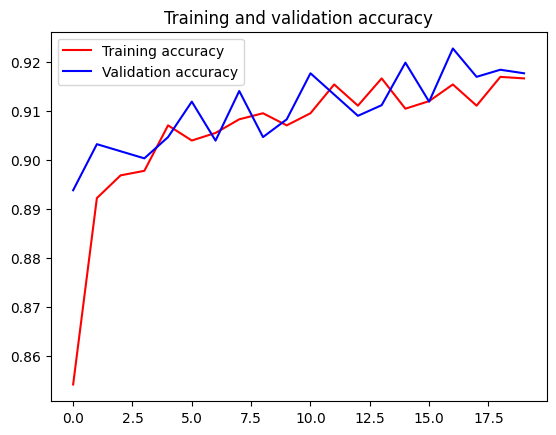

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
model.evaluate(test_generator)

174/174 [==============================] - 22s 124ms/step - loss: 0.1921 - accuracy: 0.9300


[0.19208934903144836, 0.930014431476593]

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")